In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=sns.load_dataset('titanic')

In [12]:
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [15]:
df.drop(columns=['deck','embarked','survived','pclass','adult_male'],inplace=True)

In [17]:
df['age'].fillna(df['age'].median(),inplace=True)

In [18]:
df.dropna(subset=['embark_town'],inplace=True)

In [20]:
print(df.isnull().sum())

sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
embark_town    0
alive          0
alone          0
dtype: int64


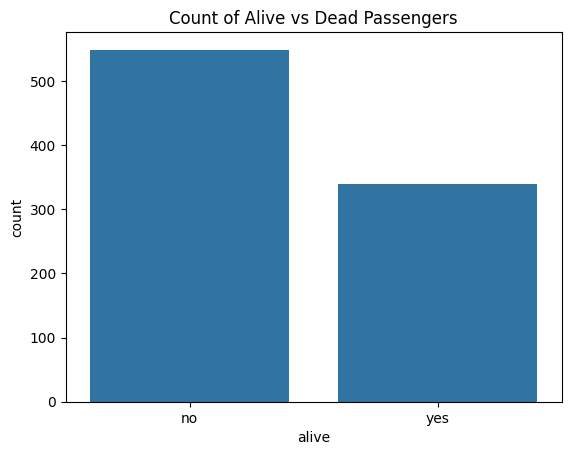

In [25]:
sns.countplot(data=df,x='alive')
plt.title('Count of Alive vs Dead Passengers')
plt.show()